In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import transforms

from pathlib import Path

from sklearn.cluster import DBSCAN

from PIL import Image
import cv2

from skimage.transform import resize

from scipy.ndimage import gaussian_filter

import os

from collections import defaultdict, deque

In [2]:
# image_path = "/Users/williamleonheart/AAA/dataset/test_v2/test/TEST_0022.jpg"  # Replace with your image path
image_path = "handwriting.jpg" 
image = Image.open(image_path)

# TEST_8392
# TEST_0002

In [3]:
width, height = image.size
width, height

(1600, 1150)

In [4]:
gray_image = image.convert("L")  # "L" mode converts the image to grayscale
gray_array = np.array(gray_image)

In [5]:
_, binary_image = cv2.threshold(gray_array, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [6]:
y_coords, x_coords = np.where(binary_image == 0)  # Dark pixels are represented by 0 in the binary image
coordinates = np.column_stack((x_coords, y_coords))

In [7]:
scaling_factor = 0.1  # You can adjust this to make the plot larger or smaller
fig_width = width * scaling_factor
fig_height = height * scaling_factor

In [8]:
db = DBSCAN(eps=2, min_samples=1).fit(coordinates)  # Adjust min_samples as needed
labels = db.labels_  # Get cluster labels for each point

In [9]:
cluster_coordinates = {}

In [10]:
plt.figure(figsize=(fig_width, fig_height))

unique_labels = set(labels)

# Define a color palette for the clusters
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Plot each cluster
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise (outliers)
        col = [0, 0, 0, 1]
    else:
        col = list(col)  # Convert color to a list for easier manipulation

    # Create a mask for points belonging to the current cluster
    class_member_mask = (labels == k)

    # Extract points for the current cluster
    xy = coordinates[class_member_mask]

    cluster_coordinates[k] = xy 

    # Plot the points in the cluster
    plt.scatter(xy[:, 0], xy[:, 1], color=tuple(col), label=f'Cluster {k}' if k != -1 else 'Noise')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
# plt.title(f'DBSCAN Clustering of Dark Pixels (eps={eps:.2f})')

# Invert the y-axis to fix the inverted image issue
plt.gca().invert_yaxis()


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
print(cluster_coordinates)

{np.int64(0): array([[171, 257],
       [172, 257],
       [173, 257],
       ...,
       [208, 716],
       [209, 716],
       [210, 716]]), np.int64(1): array([[587, 275],
       [588, 275],
       [589, 275],
       ...,
       [592, 576],
       [593, 576],
       [594, 576]]), np.int64(2): array([[687, 281],
       [688, 281],
       [689, 281],
       ...,
       [709, 644],
       [710, 644],
       [707, 645]]), np.int64(3): array([[940, 456],
       [941, 456],
       [942, 456],
       ...,
       [913, 624],
       [914, 624],
       [916, 624]]), np.int64(4): array([[426, 516],
       [427, 516],
       [428, 516],
       ...,
       [423, 666],
       [424, 666],
       [425, 666]])}


In [12]:
formatted_clusters = [
    [(int(point[0]), int(point[1])) for point in cluster]
    for cluster in cluster_coordinates.values()
]

# Print the formatted clusters
for cluster in formatted_clusters:
    print(cluster)

[(171, 257), (172, 257), (173, 257), (174, 257), (175, 257), (176, 257), (177, 257), (178, 257), (179, 257), (180, 257), (181, 257), (182, 257), (183, 257), (184, 257), (185, 257), (171, 258), (172, 258), (173, 258), (174, 258), (175, 258), (176, 258), (177, 258), (178, 258), (179, 258), (180, 258), (181, 258), (182, 258), (183, 258), (184, 258), (185, 258), (171, 259), (172, 259), (173, 259), (174, 259), (175, 259), (176, 259), (177, 259), (178, 259), (179, 259), (180, 259), (181, 259), (182, 259), (183, 259), (184, 259), (185, 259), (171, 260), (172, 260), (173, 260), (174, 260), (175, 260), (176, 260), (177, 260), (178, 260), (179, 260), (180, 260), (181, 260), (182, 260), (183, 260), (184, 260), (185, 260), (171, 261), (172, 261), (173, 261), (174, 261), (175, 261), (176, 261), (177, 261), (178, 261), (179, 261), (180, 261), (181, 261), (182, 261), (183, 261), (184, 261), (185, 261), (171, 262), (172, 262), (173, 262), (174, 262), (175, 262), (176, 262), (177, 262), (178, 262), (17

In [13]:
image = np.array(image)

plt.figure(figsize=(fig_width, fig_height))

# Display the image
plt.imshow(image, extent=[0, image.shape[1], image.shape[0], 0])  # extent ensures the image aligns with the scatter plot

# Show the plot
plt.show()

In [14]:
# Compute leftmost x for sorting
cluster_items = list(cluster_coordinates.items())

# Sort clusters by the leftmost x-coordinate
sorted_clusters = sorted(cluster_items, key=lambda item: np.min(item[1][:, 0]))

Most dense y: 530 with 173 pixels


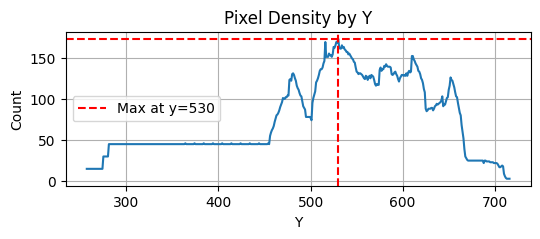

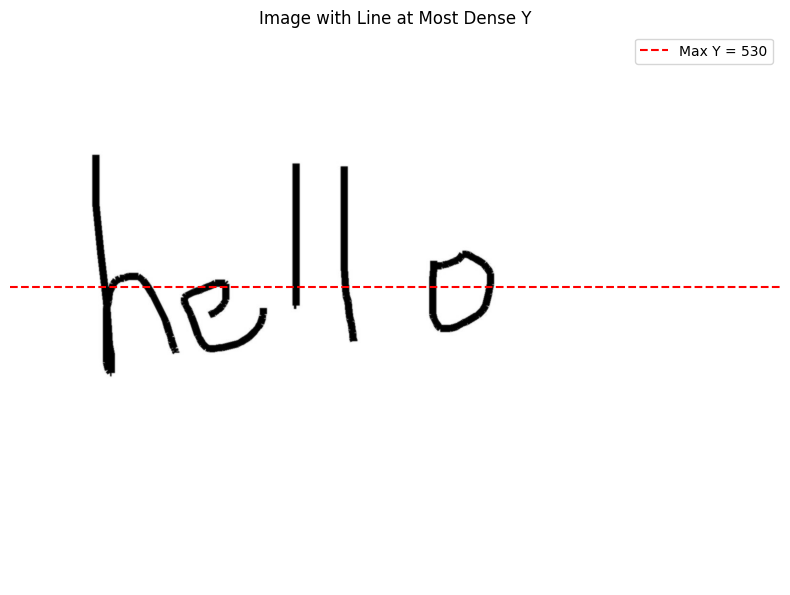

In [15]:
# Step 1: Flatten all clusters into a single list of points
all_points = [pt for cluster in formatted_clusters for pt in cluster]

# Step 2: Count how many times each y appears
y_counts = defaultdict(int)
for _, y in all_points:
    y_counts[y] += 1

# Step 3: Find the y with the maximum number of pixels
max_y = max(y_counts.items(), key=lambda item: item[1])[0]
print(f"Most dense y: {max_y} with {y_counts[max_y]} pixels")

# Step 4: Plot the histogram of y pixel density
ys_sorted = sorted(y_counts.keys())
counts_sorted = [y_counts[y] for y in ys_sorted]

plt.figure(figsize=(6, 2))
plt.plot(ys_sorted, counts_sorted)
plt.axhline(y_counts[max_y], color='red', linestyle='--', label=f'Max at y={max_y}')
plt.axvline(max_y, color='red', linestyle='--')
plt.title("Pixel Density by Y")
plt.xlabel("Y")
plt.ylabel("Count")
plt.grid(True)
plt.legend()
plt.show()

# Step 5: Draw the line on the actual image
image = np.array(image)  # make sure image is a NumPy array

fig_width = 10
fig_height = 10 * image.shape[0] / image.shape[1]  # preserve aspect ratio

plt.figure(figsize=(fig_width, fig_height))
plt.imshow(image, extent=[0, image.shape[1], image.shape[0], 0])  # flip y-axis for image coords

# Draw red horizontal line at max_y
plt.axhline(max_y, color='red', linestyle='--', linewidth=1.5, label=f'Max Y = {max_y}')

plt.title("Image with Line at Most Dense Y")
plt.axis('off')
plt.legend()
plt.show()


In [16]:
cluster_bounding_boxes = {}

for idx, cluster in enumerate(formatted_clusters):
    cluster = np.array(cluster)
    xs, ys = cluster[:, 0], cluster[:, 1]
    left, right = xs.min(), xs.max()
    top, bottom = ys.min(), ys.max()
    cluster_bounding_boxes[idx] = (left, right, top, bottom)

In [17]:
# Make a copy to draw on
image_with_boxes = image.copy()

# Draw rectangles
for (left, right, top, bottom) in cluster_bounding_boxes.values():
    top_left = (left, top)
    bottom_right = (right, bottom)
    cv2.rectangle(image_with_boxes, top_left, bottom_right, color=(0, 0, 255), thickness=2)

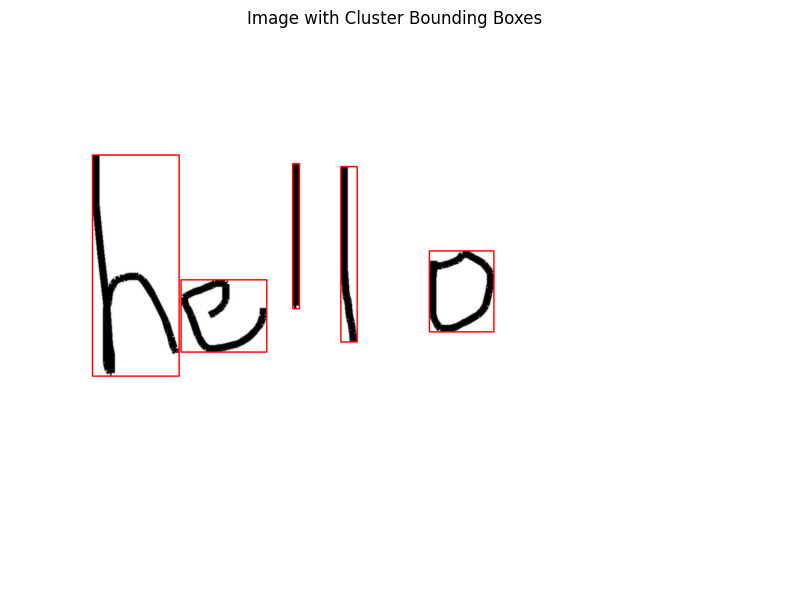

In [18]:
# Convert BGR to RGB for display
plt.figure(figsize=(10, 10 * image.shape[0] / image.shape[1]))
plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
plt.title("Image with Cluster Bounding Boxes")
plt.axis('off')
plt.show()

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from collections import defaultdict, deque

# 1. Build point-to-cluster map
point_to_cluster = {}
cluster_points_sets = []
for idx, cluster in enumerate(formatted_clusters):
    s = set(cluster)
    cluster_points_sets.append(s)
    for pt in cluster:
        point_to_cluster[pt] = idx

# 2. Build adjacency map based on upward lines
adjacency = defaultdict(set)
y_threshold = 322

for idx, cluster in enumerate(formatted_clusters):
    for (x, y) in cluster:
        if y < y_threshold:
            for ny in range(y - 1, -1, -1):  # move upward
                pt = (x, ny)
                if pt in point_to_cluster:
                    other_idx = point_to_cluster[pt]
                    if other_idx != idx:
                        adjacency[idx].add(other_idx)
                        adjacency[other_idx].add(idx)
                    break

# 3. Merge connected clusters
visited = set()
merged_clusters_dict = {}
merged_id = 0

for idx in range(len(formatted_clusters)):
    if idx in visited:
        continue

    # BFS to find connected cluster group
    q = deque([idx])
    merged_indices = set()

    while q:
        current = q.popleft()
        if current in visited:
            continue
        visited.add(current)
        merged_indices.add(current)
        q.extend(adjacency[current] - visited)

    # Combine points from all merged clusters
    merged_points = []
    for m_idx in merged_indices:
        merged_points.extend(formatted_clusters[m_idx])

    merged_clusters_dict[np.int64(merged_id)] = np.array(merged_points)
    merged_id += 1

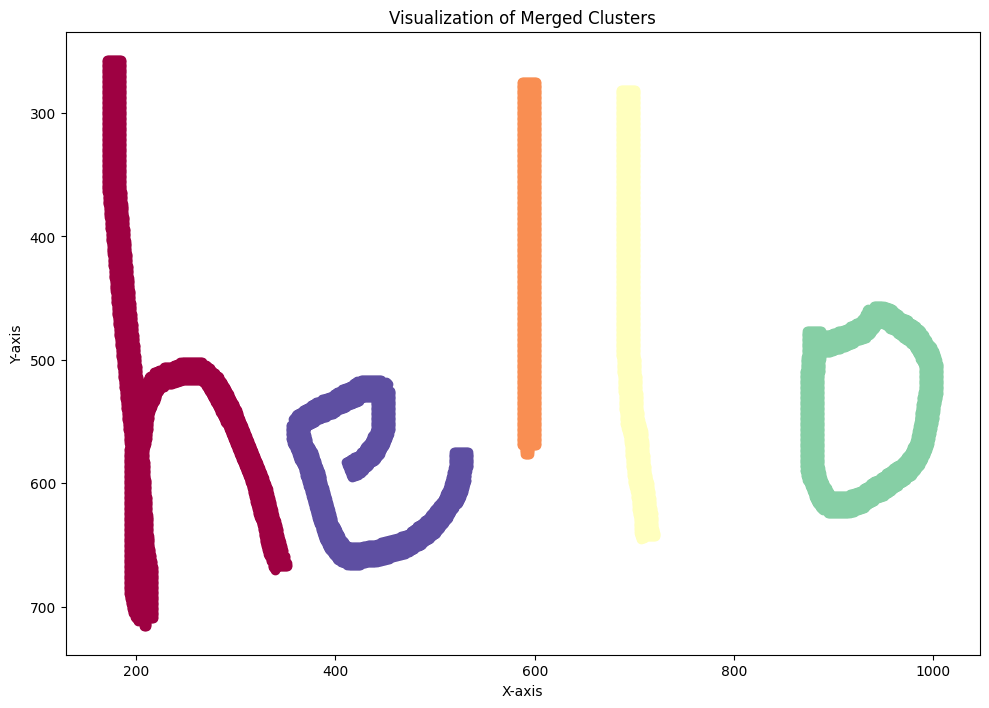

In [20]:
unique_labels = list(merged_clusters_dict.keys())

# Define a color palette for the clusters
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Plot each cluster in the merged clusters
plt.figure(figsize=(fig_width, fig_height))

for k, col in zip(unique_labels, colors):
    col = list(col)  # Convert color to list for easier manipulation

    # Extract points for the current merged cluster
    xy = merged_clusters_dict[k]

    # Plot the points in the current merged cluster
    plt.scatter(xy[:, 0], xy[:, 1], color=tuple(col), label=f'Merged Cluster {k}')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Visualization of Merged Clusters')

# Invert the y-axis to fix the inverted image issue
plt.gca().invert_yaxis()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
merged_clusters_dict

{np.int64(0): array([[171, 257],
        [172, 257],
        [173, 257],
        ...,
        [208, 716],
        [209, 716],
        [210, 716]]),
 np.int64(1): array([[587, 275],
        [588, 275],
        [589, 275],
        ...,
        [592, 576],
        [593, 576],
        [594, 576]]),
 np.int64(2): array([[687, 281],
        [688, 281],
        [689, 281],
        ...,
        [709, 644],
        [710, 644],
        [707, 645]]),
 np.int64(3): array([[940, 456],
        [941, 456],
        [942, 456],
        ...,
        [913, 624],
        [914, 624],
        [916, 624]]),
 np.int64(4): array([[426, 516],
        [427, 516],
        [428, 516],
        ...,
        [423, 666],
        [424, 666],
        [425, 666]])}

In [22]:
# Sort merged_clusters_dict by the minimum x-coordinate of each cluster
sorted_clusters = sorted(merged_clusters_dict.items(), key=lambda item: np.min(item[1][:, 0]))

# Rebuild the dictionary with new keys starting from 0
sorted_clusters_dict = {i: cluster for i, (_, cluster) in enumerate(sorted_clusters)}

In [23]:
np.set_printoptions(threshold=np.inf)

In [24]:
resized_boxes = {}

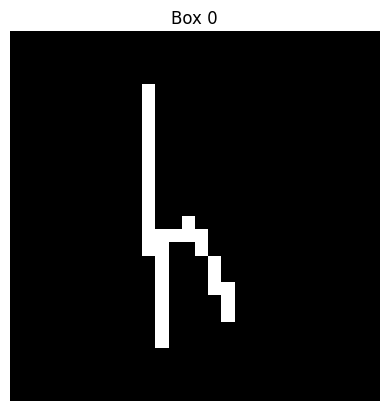

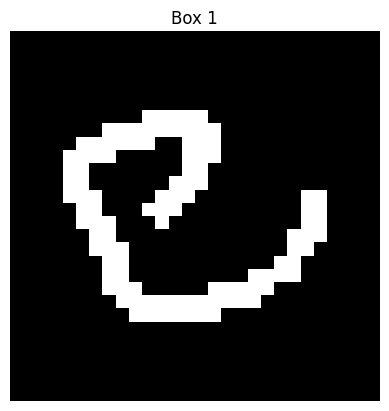

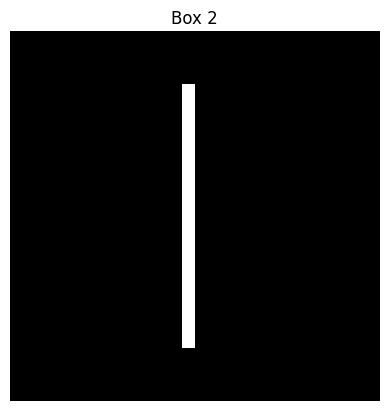

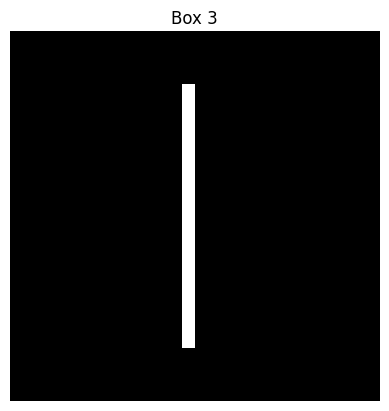

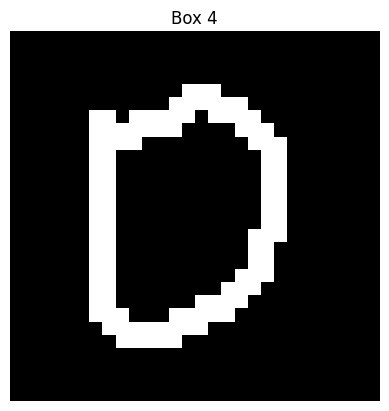

In [26]:
for key, cluster in sorted_clusters_dict.items():
    cluster = np.array(cluster)
    
    # Skip empty clusters
    if len(cluster) == 0:
        print(f"Warning: Cluster {key} is empty. Skipping.")
        continue

    xs, ys = cluster[:, 0], cluster[:, 1]

    # Define bounding box
    left, right = xs.min(), xs.max()
    top, bottom = ys.min(), ys.max()
    
    width = right - left + 1
    height = bottom - top + 1

    # Skip if width or height is zero (invalid box)
    if width <= 0 or height <= 0:
        print(f"Warning: Invalid dimensions for cluster {key}. Skipping.")
        continue

    # Create a white box (grayscale)
    box_img = np.full((height, width), 255, dtype=np.uint8)

    # Plot black pixels
    for x, y in cluster:
        box_x = x - left
        box_y = y - top
        box_img[box_y, box_x] = 0

    # Convert to RGB
    image = cv2.cvtColor(box_img, cv2.COLOR_GRAY2RGB)

    # Resize while maintaining aspect ratio
    target_size = 20
    h, w = image.shape[:2]
    
    # Avoid division by zero if max(h, w) == 0
    max_dim = max(h, w)
    if max_dim == 0:
        print(f"Warning: Zero-sized image in cluster {key}. Skipping.")
        continue

    scale = target_size / max_dim
    new_w = max(1, int(w * scale))  # Ensure at least 1 pixel
    new_h = max(1, int(h * scale))  # Ensure at least 1 pixel

    resized_img = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)

    # Convert to grayscale and threshold to remove interpolation artifacts
    gray_resized = cv2.cvtColor(resized_img, cv2.COLOR_RGB2GRAY)
    _, binary_resized = cv2.threshold(gray_resized, 200, 255, cv2.THRESH_BINARY)

    # Convert back to RGB to paste on canvas
    resized_img_bw = cv2.cvtColor(binary_resized, cv2.COLOR_GRAY2RGB)

    # Create a white 28x28 canvas
    canvas = np.full((28, 28, 3), 255, dtype=np.uint8)

    # Center the resized image on the canvas
    x_offset = (28 - new_w) // 2
    y_offset = (28 - new_h) // 2
    canvas[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized_img_bw

    # Invert for MNIST-style black background
    inverted_canvas = cv2.bitwise_not(canvas)

    # Store the result
    resized_boxes[key] = inverted_canvas

    # Display
    plt.imshow(inverted_canvas, cmap='gray')
    plt.title(f"Box {key}")
    plt.axis('off')
    plt.show()

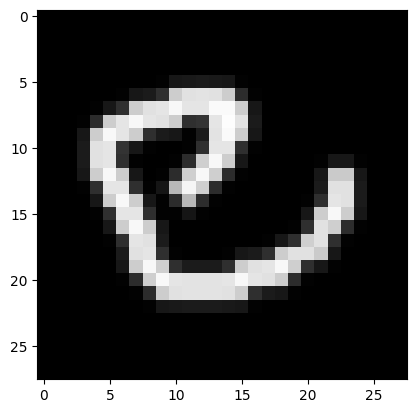

In [27]:
def apply_gaussian_blur(image, sigma=1):
    """
    Apply Gaussian blur to the image.
    
    :param image: The input image (numpy array).
    :param sigma: Standard deviation of the Gaussian kernel.
    :return: Blurred image.
    """
    blurred_image = gaussian_filter(image, sigma=sigma)
    return np.clip(blurred_image, 0, 255).astype(np.uint8)

blurred_image = apply_gaussian_blur(resized_boxes[1], sigma=0.5)

# Display the blurred image
plt.imshow(blurred_image)
plt.show()

In [28]:
blurred_images = {}

for image_name, image in resized_boxes.items():
    blurred_image = apply_gaussian_blur(image)
    blurred_images[image_name] = blurred_image

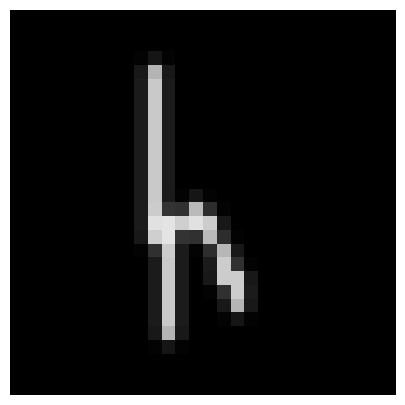

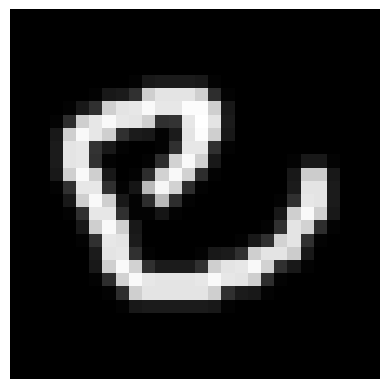

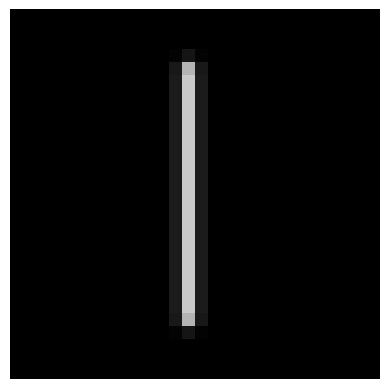

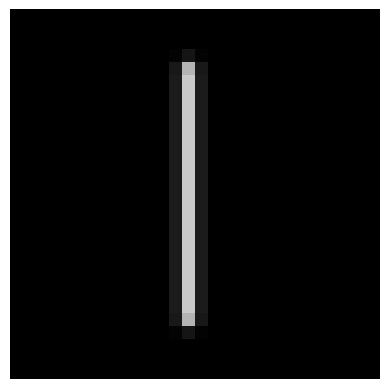

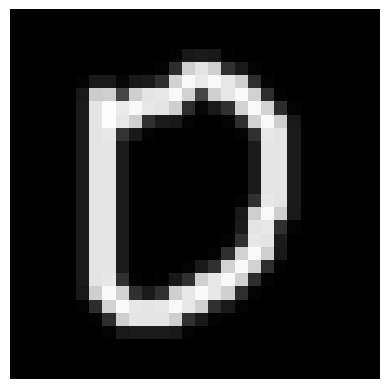

In [29]:
# Function to apply Gaussian Blur
def apply_gaussian_blur(image, kernel_size=(5, 5), sigma=0.5):
    return cv2.GaussianBlur(image, kernel_size, sigma)

# Create the plot for displaying the images
plt.figure(figsize=(10, 5))

# Iterate through the dictionary and apply the Gaussian blur
for i, (image_name, image) in enumerate(resized_boxes.items(), 1):
    # Apply the Gaussian Blur
    blurred_image = apply_gaussian_blur(image)

    # Display the blurred image
    plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB
    plt.axis('off')

    plt.show()

In [30]:
DICTIONARY_FOR_NN = resized_boxes

In [31]:
# Define output folder
output_folder = "new_img"

# Create the folder if it doesn't exist, or clear it if it does
if os.path.exists(output_folder):
    # Remove all files in the folder
    for filename in os.listdir(output_folder):
        file_path = os.path.join(output_folder, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)
else:
    os.makedirs(output_folder)

# Save each image in the dictionary to the folder
for key, image in DICTIONARY_FOR_NN.items():
    file_path = os.path.join(output_folder, f"image_{key}.png")
    cv2.imwrite(file_path, image)
    print(f"Saved {file_path}")

Saved new_img/image_0.png
Saved new_img/image_1.png
Saved new_img/image_2.png
Saved new_img/image_3.png
Saved new_img/image_4.png


In [32]:
DROPOUT = 0.6

In [33]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Feature extraction layers
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5)  # Input: 1 channel (grayscale)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv2_drop = nn.Dropout2d(p=DROPOUT)

        # Calculate flattened size correctly:
        # Input: 28x28
        # After conv1 (kernel=5, no padding): 28-5+1 = 24x24
        # After maxpool (kernel=2): 12x12
        # After conv2 (kernel=5): 12-5+1 = 8x8
        # After maxpool (kernel=2): 4x4
        self.flattened_size = 32 * 4 * 4  # 32 channels * 4x4 spatial dim

        # Classification head
        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc1_drop = nn.Dropout(p=DROPOUT)
        self.fc2 = nn.Linear(128, 26)  # 26 classes for A-Z

    def forward(self, x):
        # Input shape: [batch, 1, 28, 28]

        # Conv1 -> BN -> ReLU -> MaxPool
        x = F.relu(F.max_pool2d(self.bn1(self.conv1(x)), kernel_size=2))  # [B, 16, 12, 12]

        # Conv2 -> BN -> Dropout -> ReLU -> MaxPool
        x = F.relu(F.max_pool2d(self.conv2_drop(self.bn2(self.conv2(x))), kernel_size=2))  # [B, 32, 4, 4]

        # Flatten
        x = x.view(-1, self.flattened_size)

        # FC layers
        x = F.relu(self.fc1(x))
        x = self.fc1_drop(x)
        x = self.fc2(x)

        return F.log_softmax(x, dim=1)

In [34]:
# model = CNN()

# Load the saved state dictionary
# model_path = 'models/emnist_cnn_model.pth'

# Load the saved state dictionary
# model.load_state_dict(torch.load(model_path, weights_only=True))

# Set the model to evaluation mode
# model.eval()

In [35]:
model_path = 'models/emnist_cnn_model_nogray.pth'

In [36]:
# Recreate the model architecture
loaded_model = CNN()

# Load the saved state dictionary
loaded_model.load_state_dict(torch.load(model_path))

# Set the model to evaluation mode
loaded_model.eval()

/var/folders/kt/1z0_7z79269b6p7bdrjn3m340000gn/T/ipykernel_7286/2585001405.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model_

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_drop): Dropout2d(p=0.6, inplace=False)
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc1_drop): Dropout(p=0.6, inplace=False)
  (fc2): Linear(in_features=128, out_features=26, bias=True)
)

In [37]:
by_merge_map = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 
    7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 
    14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 
    20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'
}

letter_to_number = {v: k for k, v in by_merge_map.items()}
classes = list(by_merge_map.keys())

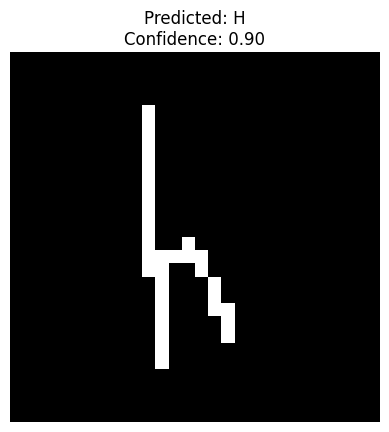

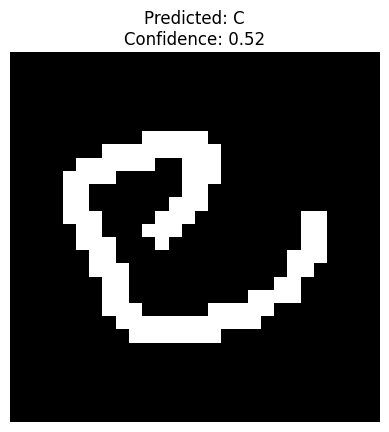

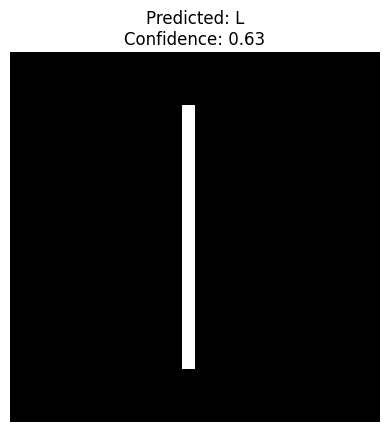

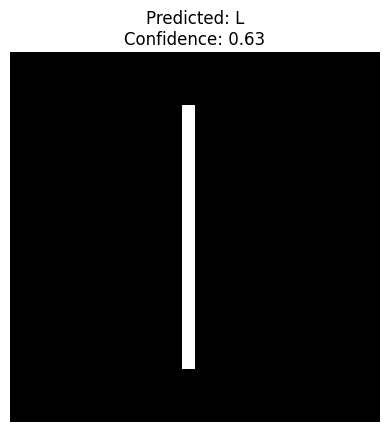

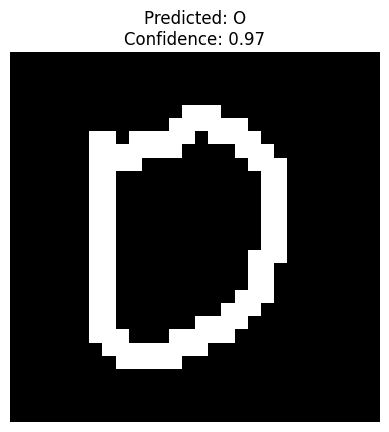

Combined predictions: HCLLO

Individual predictions:
image_0.png: H (confidence: 0.90)
image_1.png: C (confidence: 0.52)
image_2.png: L (confidence: 0.63)
image_3.png: L (confidence: 0.63)
image_4.png: O (confidence: 0.97)


In [38]:
def predict_letters_from_directory(directory_path, model, by_merge_map):
    """
    Predicts letters for all PNG images in the given directory and combines them into a string.

    Args:
        directory_path (str): Path to the directory containing PNG images.
        model (torch.nn.Module): Trained PyTorch model.
        by_merge_map (dict): Dictionary mapping class indices to letters.

    Returns:
        str: Combined string of predicted letters from all images.
        list: List of tuples containing (image_path, predicted_letter, confidence) for each image.
    """
    # Get all PNG files in the directory
    image_files = [f for f in os.listdir(directory_path) if f.lower().endswith('.png')]
    image_files.sort()  # Sort to maintain order
    
    predicted_string = ""
    predictions = []
    
    for image_file in image_files:
        image_path = os.path.join(directory_path, image_file)
        
        # Load and process the image
        image = Image.open(image_path).convert('L')  # Convert to grayscale
        image = image.resize((28, 28))
        image_array = np.array(image) / 255.0
        image_tensor = torch.tensor(image_array, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
        
        # Make prediction
        model.eval()
        with torch.no_grad():
            output = model(image_tensor)
            probabilities = torch.softmax(output, dim=1)
            confidence, prediction = torch.max(probabilities, dim=1)
            confidence = confidence.item()
            prediction = prediction.item()
        
        # Map the prediction to a letter
        predicted_letter = by_merge_map.get(prediction, "?")
        predicted_string += predicted_letter
        
        # Store individual prediction info
        predictions.append((image_path, predicted_letter, confidence))
        
        # Visualize the prediction (optional)
        plt.figure()
        plt.imshow(image_array, cmap='gray')
        plt.title(f"Predicted: {predicted_letter}\nConfidence: {confidence:.2f}")
        plt.axis('off')
        plt.show()
    
    return predicted_string, predictions

# Example usage:
directory_path = "new_img/"  # Directory containing your PNG images
predicted_string, individual_predictions = predict_letters_from_directory(directory_path, loaded_model, by_merge_map)

print(f"Combined predictions: {predicted_string}")
print("\nIndividual predictions:")
for img_path, letter, conf in individual_predictions:
    print(f"{os.path.basename(img_path)}: {letter} (confidence: {conf:.2f})")

In [39]:
print(predicted_string.lower().capitalize())

Hcllo
